In [2]:
import random
import matplotlib 
from matplotlib import pyplot as plt 
import numpy as np
import pylab
from pylab import *
import copy
from copy import deepcopy

#M PAREKATZE-EREDUA: "lotu" funtzioak l_2 zein l_3 ertzetan ezartzen ditugun atazaren arabera lortzen den
#kostu akumulatua zein den bueltatzen du. "politika" funtzio bakarra dago baina guk bi politika desberdin 
#konparatu ditugu. Bi politika desberdinak konparatzeko egin duguna izan da politika funtzioko 3. eta 4. 
#puntuak lekuz aldatu.
#Horretaz gain, 3D-ko grafiko bat bueltatzen du funtzioak. Zeinek amaieran lortu diren kostu akumulatuen 
#batezbestekoak marrazten dituen ataza desberdinetarako.


#POLITIKA FUNTZIOA
def politika(x,t1,t2,iritsierak):
    # 1go: l_1-eko parektaze guztiak egitea:
    parekatzeak=min(x[0],x[2]); #d_1-en eta s_1-en zenbat elementu parekatuko ditugun kalkulatu
    x=list(np.array(x)-np.array([parekatzeak,0,parekatzeak,0,0])); #Parekatzeen ostean nodo bakoitzean zenbat elementu geratu diren 
    # 2.: l_4 ertzeko parekatze guztiak egitea:
    parekatzeak=min(x[1],x[4]); #d_2 eta s_3 nodoetan zenbat elementu parekatuko ditugun kalkulatu
    x=list(np.array(x)-np.array([0,parekatzeak,0,0,parekatzeak]));#Parekatzeen ostean nodo bakoitzean zenbat elementu geratu diren
    # 4.: Ikusi ea l_3-koak parekatzea komenigarria den
    if x[1] and x[3] >= t2:#d_2 eta s_2 nodoetako elementu kopurua t_2 ataza baino handiagoa bada:
        parekatzeak=min(x[1],x[3])-t2;#d_2 eta s_2 nodoetan t_2 elementu geratu arte loturak egingo ditugu
        x=list(np.array(x)-np.array([0,parekatzeak,0,parekatzeak,0]));#Parekatzeak egin ostean nodo bakoitzean zenbat elementu geratu diren
    # 3.: Ikusi ea l_2-koak parekatzea komenigarria den
    if x[0] and x[3] >= t1:#d_1 eta s_2 nodoetako elementu kopurua t_1 ataza baino handiagoa bada:
        parekatzeak=min(x[0],x[3])-t1;#Elementuak parekatu d_1 eta s_2 nodoan t_1 elementu geratu arte.
        x=list(np.array(x)-np.array([parekatzeak,0,0,parekatzeak,0]));#Parekatzeen ostean zenbat elementu geratu diren nodo bakoitzean.
    return x #Politika funtzioak x bektorea bueltatzen du. Hau da, parekatzeak egin ostean nodo bakoitzean geratu den elementu kopurua zein den esaten diguna.


#FUNTZIO PRINTZIPALA:
#x: Nodo bakoitzak hasieran duen elementu kopurua. Bektore bat da.
#t1: l_2 ertzean ezarritako ataza. Zenbaki bat da.
#t2: l_3 ertzean ezarritako ataza. Zenbaki bat da.
#iritsierak: Random zenbakiez osatutako matrize bat da. 
def lotu(x,t1,t2,iritsierak):
    baturak=[];
    x_guztiak=[];
    p=[0.75,0.25,0.2,0.7,0.1];# Elementuek nodo bakoitzera iristeko duten probabilitatea
    a=len(iritsierak);#Zenbat denbora une egongo diren
    for i in range (0,a+1):#Iritsiera bakoitzerako:
        x=politika(x,t1,t2,iritsierak);# Politika funtzioak bueltatu digun azken x bektorea gordetzen du
        x_guztiak.append(deepcopy(x))# Politika funtzioak bueltazen digun x bakoitza gordetzen du matrizen baten.
        if i<a:
            # Une bakoitzean iristen den elementua ze nodotara joango den erabaki
            # Eskari nodoak
            if iritsierak[i][0]>p[0]:#i. random zenbakia d_1 nodora elementuek iristeko duten probabilitatea baino handiagoa (alpha1) bada:
                x[1]=x[1]+1; #Orduan, elementu bat gehituko da d_2
            else:
                x[0]=x[0]+1; #Bestela, elementua d1-en gehituko da
            # Hornidura nodoak
            if iritsierak[i][1]> (p[2]+p[3]):#i. random zenbakia beta1+beta2 probabilitateak baino handiagoa bada
                x[4]=x[4]+1;#Orduan, s_3 nodora iritsiko da elementua
            if iritsierak[i][1]>p[2] and iritsierak[i][1]< (p[2]+p[3]):#i. random zenbakia beta1 baino handiagoa bada baina beta1+beta2 baino txikiagoa
                x[3]=x[3]+1;#Orduan, s_2 nodora iritsiko da elementua
            if iritsierak[i][1]<p[2]:#Bestela
                x[2]=x[2]+1;# s_1 nodora iritsiko da elementua
    else:
        # Grafikoa marraztuko dugu
        for i in range(0,len(x_guztiak)):
            baturak.append(sum(x_guztiak[i]));# n debora tarte bakoitzean zenbat elementu dauden sisteman
        # kostu akumulatua honela kalkulatzen da: kostua+(delta**i * baturak[i])
        delta=0.999;
        kostua=0; #Hasieran
        kostu_lista=[];
        for i in range (0,a+1):
            kostua=kostua+(delta**i * baturak[i])
            kostu_lista.append(kostua) #Kostu akumulatuen lista
    return kostu_lista #Kostu akumulatuen lista kalkulatzen du (formularen arabera)

[941.8638754126209, 1718.7883665678478, 2652.0770471676487, 3329.9852301796473, 4528.128746365714, 3955.297653183424, 5351.850145122295, 5528.338455481998, 7571.181281480532, 5818.045839435668, 6414.8948971757545, 7406.986477989025, 7240.518450140792, 9464.23038050684, 9454.77063241947, 11344.362109719594]


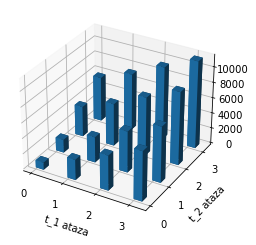

In [3]:
# 3D irudiak

import random
import matplotlib 
from matplotlib import pyplot as plt 
import numpy as np
import pylab
from pylab import *
import copy
from copy import deepcopy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm


#Batazbestekoarena
x=[0,0,0,0,0]
n=20000
lista_0=[];
lista_1=[];
lista_2=[];
lista_4=[];
lista_7=[];
lista_10=[];
lista_15=[];
lista_20=[];
lista_21=[];
lista_22=[];
lista_23=[];
lista_24=[];
lista_25=[];
lista_26=[];
lista_27=[];
lista_28=[];

for i in range(0,30):
    iritsierak = np.random.random((n,2))
    lista_0.append(lotu(x,0,0,iritsierak))
    lista_1.append(lotu(x,0,1,iritsierak))
    lista_2.append(lotu(x,1,0,iritsierak))
    lista_4.append(lotu(x,1,1,iritsierak))
    lista_7.append(lotu(x,2,0,iritsierak))
    lista_10.append(lotu(x,0,2,iritsierak))
    lista_15.append(lotu(x,2,1,iritsierak))
    lista_20.append(lotu(x,1,2,iritsierak))
    lista_21.append(lotu(x,2,2,iritsierak))
    lista_22.append(lotu(x,0,3,iritsierak))
    lista_23.append(lotu(x,3,0,iritsierak))
    lista_24.append(lotu(x,1,3,iritsierak))
    lista_25.append(lotu(x,3,1,iritsierak))
    lista_26.append(lotu(x,3,2,iritsierak))
    lista_27.append(lotu(x,2,3,iritsierak))
    lista_28.append(lotu(x,3,3,iritsierak))

#Ataza bakoitzarekin lortzen den kostu akumulatuaren batezbestekoa bueltatzen du
dz=[mean(lista_0),mean(lista_1),mean(lista_2),mean(lista_4),mean(lista_7),mean(lista_10),mean(lista_15),mean(lista_20),mean(lista_21),mean(lista_22),mean(lista_23),mean(lista_24),mean(lista_25),mean(lista_26),mean(lista_27),mean(lista_28)]   
print(dz)


#Marraztu
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')


# Barra bakoitzaren koordenatuak. zutabea nondik hastea nahi dugun (z-rena zero izango da behetik hastea nahi dugulako)
x3 = [0,0,1,1,2,0,2,1,2,0,3,1,3,3,2,3]
y3 = [0,1,0,1,0,2,1,2,2,3,0,3,1,2,3,3]
z3 = np.zeros(16)


dx= [0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25] #Barra bakoitzaren zabalera
dy= [0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25] #Barra bakoitzaren sakonera
dz = dz #Barra bakoitzaren altuera

ax1.bar3d(x3, y3, z3, dx, dy, dz)
xlabel('t_1 ataza')
ylabel('t_2 ataza')

plt.show()

